In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali_Sales_Data.csv')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.drop(['Status', 'unnamed1'], axis =1, inplace = True)

In [11]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
df.dropna(inplace = True)

In [13]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99
10,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770.00


In [14]:
df['Amount'] = df['Amount'].astype('int')

In [16]:
df['Amount'].dtypes

dtype('int64')

In [17]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


Exploratory data analysis

Gender-wise Customer Distribution

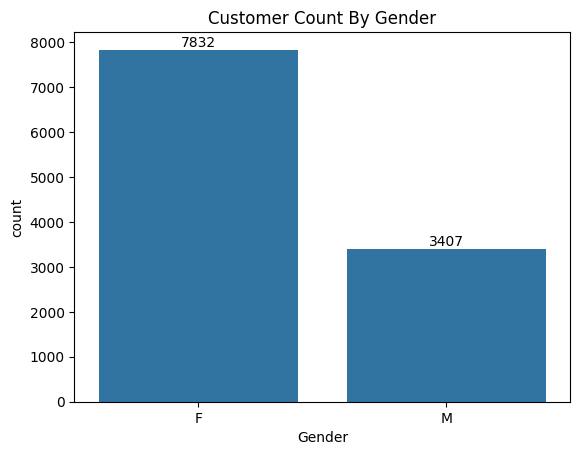

Gender
F    69.685915
M    30.314085
Name: proportion, dtype: float64


In [29]:
ax = sns.countplot(data = df, x = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Customer Count By Gender')
plt.show()

# Percentage breakdown
gender_percent = df['Gender'].value_counts(normalize=True) * 100
print(gender_percent)

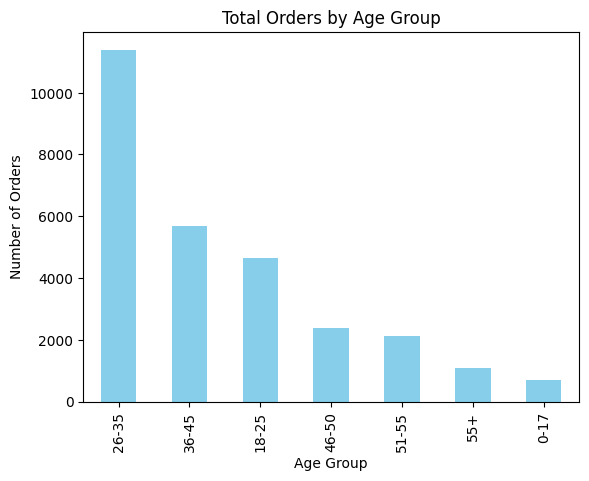

In [30]:
age_orders = df.groupby('Age Group')['Orders'].sum().sort_values(ascending=False)

age_orders.plot(kind='bar', color='skyblue')
plt.title("Total Orders by Age Group")
plt.ylabel("Number of Orders")
plt.show()


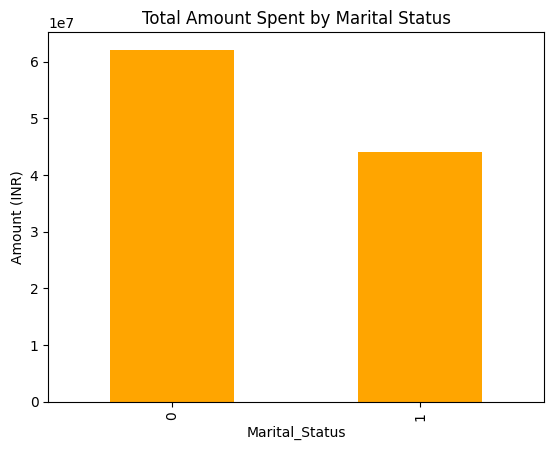

In [31]:
marital_spend = df.groupby('Marital_Status')['Amount'].sum()

# Bar plot
marital_spend.plot(kind='bar', color='orange')
plt.title("Total Amount Spent by Marital Status")
plt.ylabel("Amount (INR)")
plt.show()

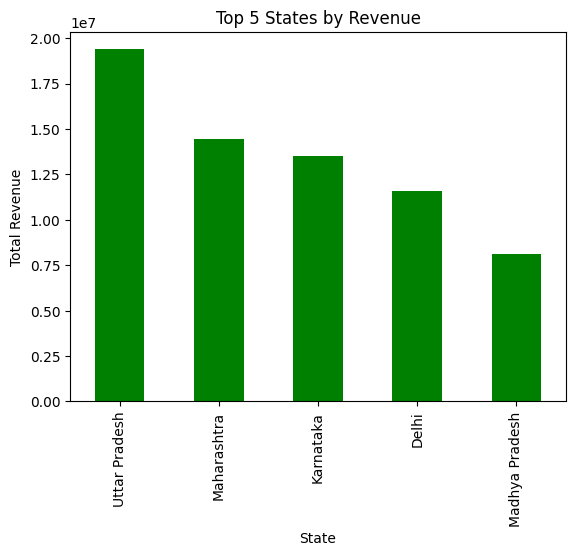

In [32]:
top_states = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(5)

top_states.plot(kind='bar', color='green')
plt.title("Top 5 States by Revenue")
plt.ylabel("Total Revenue")
plt.show()

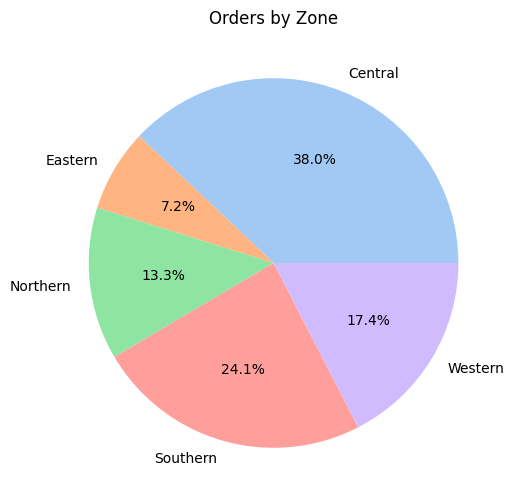

In [33]:
zone_orders = df.groupby('Zone')['Orders'].sum()

zone_orders.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=sns.color_palette('pastel'))
plt.title("Orders by Zone")
plt.ylabel("")
plt.show()

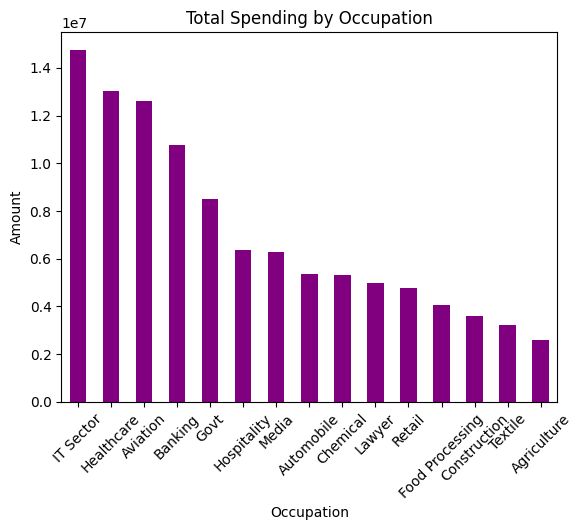

In [34]:
occ_spending = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)

occ_spending.plot(kind='bar', color='purple')
plt.title("Total Spending by Occupation")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

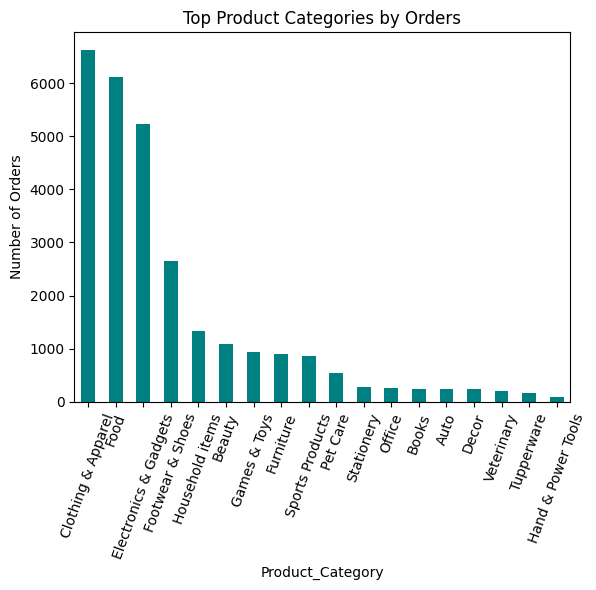

In [38]:
top_products = df.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False)

top_products.plot(kind='bar', color='teal')
plt.title("Top Product Categories by Orders")
plt.ylabel("Number of Orders")
plt.xticks(rotation=70)
plt.show()

In [39]:
total_orders = len(df)
unique_customers = df['User_ID'].nunique()

repeat_rate = (1 - unique_customers / total_orders) * 100
print(f"Estimated Repeat Customer Rate: {repeat_rate:.2f}%")

Estimated Repeat Customer Rate: 66.62%


In [40]:
high_value = df.groupby('User_ID')['Amount'].sum().sort_values(ascending=False).head(10)

print("Top 10 High-Value Customers:")
print(high_value)


Top 10 High-Value Customers:
User_ID
1001680    281034
1001941    239147
1003476    220435
1002665    201104
1003808    197660
1004425    194343
1003618    189921
1000424    187679
1004682    185122
1001298    184045
Name: Amount, dtype: int64


<Axes: title={'center': 'top 10 most sold products'}, xlabel='Product_ID'>

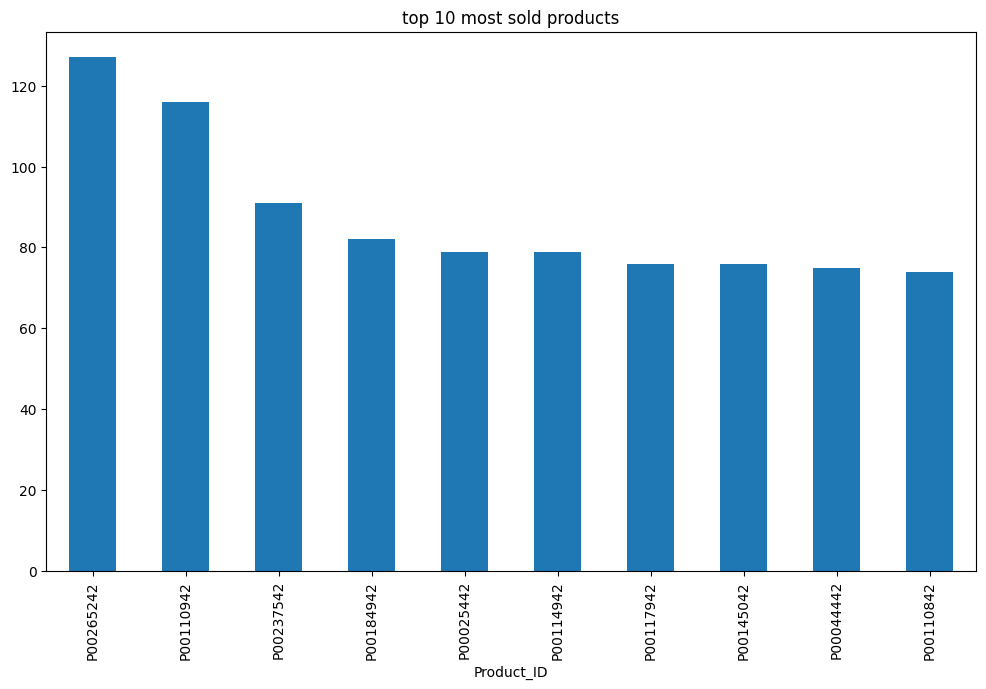

In [41]:
fig1, ax1 = plt.subplots(figsize=(12,7))
plt.title("top 10 most sold products")
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: title={'center': 'Sold Products'}, xlabel='Product_Category', ylabel='Amount'>

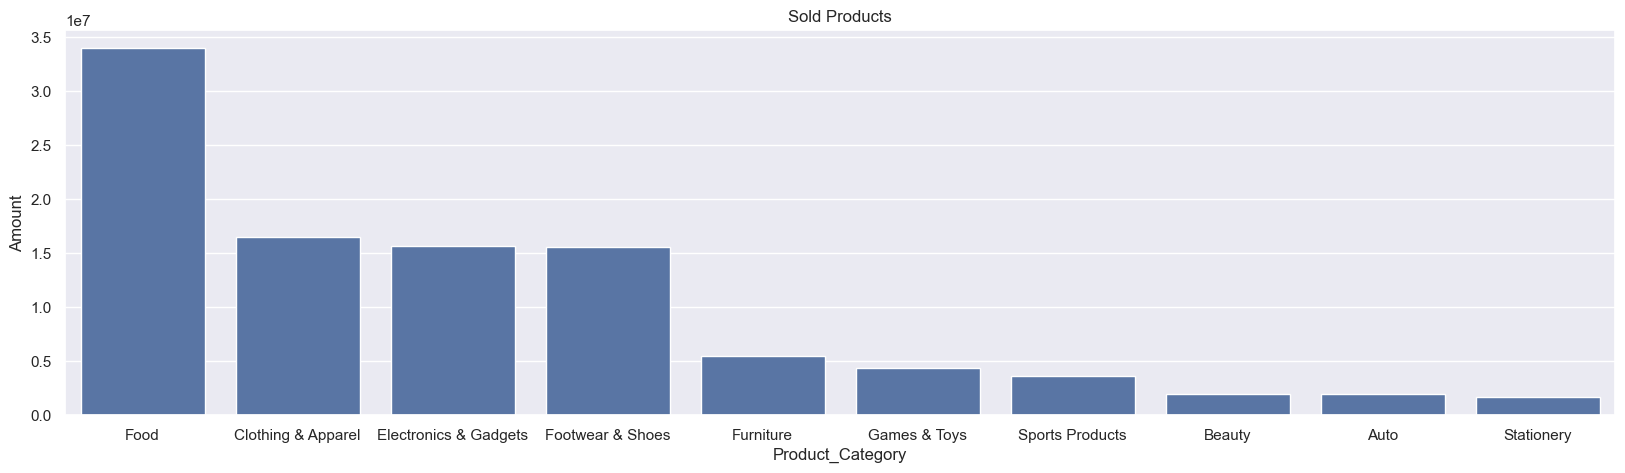

In [43]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.title('Sold Products')
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')